Автор задач Karpov.Courses
https://karpov.courses/analytics?_gl=1*k4q7fv*_ga*MTIzOTE2ODc5MS4xNzA4NDEyMTEy*_ga_DZP7KEXCQQ*MTcxMDQxMTg2OS41Ni4xLjE3MTA0MTUyODkuMTAuMC4w

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
path_to_file = '3_taxi_peru.csv'

In [15]:
#Загрузите датасет, используя ; в качестве разделителя. 
#Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).


In [16]:
taxi = pd.read_csv(path_to_file, sep=';', encoding='windows-1251', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [23]:
#Проверьте, с какой платформы было сделано больше всего заказов.


source_df = taxi.groupby('source', as_index=False).agg({'end_lon':'count'})\
    .rename(columns={'end_lon':'count_users'})\
    .sort_values('count_users')

source = source_df.source[source_df.count_users.idxmax()]
count_users = source_df.count_users[source_df.count_users.idxmax()]

In [25]:
print("Наибольшее число заказов было сделано с платформы {source_} ({count_users_})"\
      .format(source_=source, count_users_=count_users))

Наибольшее число заказов было сделано с платформы iPhone (9741)


In [26]:
#Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), 
#а по оси y – количество заказов (абсолютные значения).

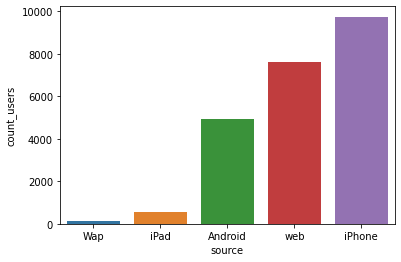

In [27]:
ax = sns.barplot(data=source_df, x="source", y="count_users")

Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

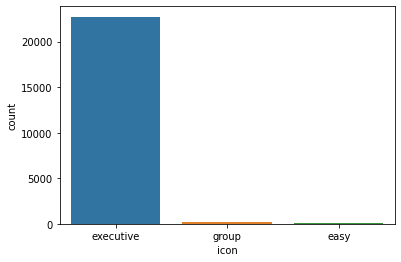

In [28]:
sns.countplot(data=taxi, x='icon')

Теперь попробуем построить более сложный график!

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

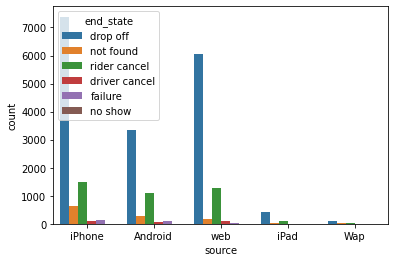

In [29]:
sns.countplot(data=taxi, x='source', hue='end_state')

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

1.Посчитайте частоту встречаемости каждой из оценок
2.Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
3.Сбросьте индексы
4.Переименуйте колонки в driver_score и percentage
5.Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6.Запишите результат в driver_score_counts

In [30]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [31]:
driver_score_df = taxi.groupby('driver_score')\
    .agg({'driver_id':'count'})
driver_score_df

,driver_id
driver_score,
0.0,1094
1.0,94
2.0,62
3.0,227
4.0,1674
5.0,4499


In [32]:
driver_score_ = taxi.driver_score.value_counts()
driver_score_ 

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [33]:
#Переведите в проценты и округлите до 2 знаков после точки 

driver_score_ = driver_score_.mul(100).round(2)

In [34]:
driver_score_df_1 = driver_score_.reset_index()
driver_score_df_1.head(6)

,index,driver_score
0,5.0,449900
1,4.0,167400
2,0.0,109400
3,3.0,22700
4,1.0,9400
5,2.0,6200


In [35]:
#Переименуйте колонки в driver_score и percentage
#Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
#Запишите результат в driver_score_counts
driver_score_counts = driver_score_df_1.rename(columns={'index':'driver_score','driver_score':'percentage'}).sort_values('driver_score')

In [36]:
driver_score_counts = taxi.driver_score.value_counts(normalize=True)\
    .mul(100).round(2).reset_index()\
    .rename(columns={'index':'driver_score','driver_score':'percentage'})\
    .sort_values('driver_score')

Теперь строим график!

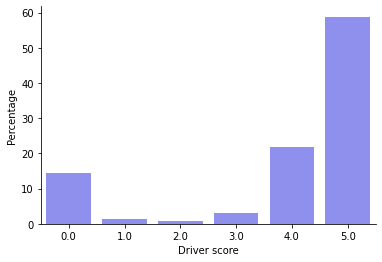

In [37]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика

In [38]:
taxi = pd.read_csv(path_to_file, sep=';', encoding='windows-1251', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [39]:
rider_score_counts = taxi.rider_score.value_counts(normalize=True)\
    .mul(100).round(2).reset_index()\
    .rename(columns={'index':'rider_score','rider_score':'percentage'})\
    .sort_values('rider_score')

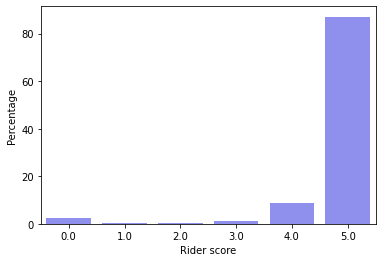

In [40]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
plt.show()

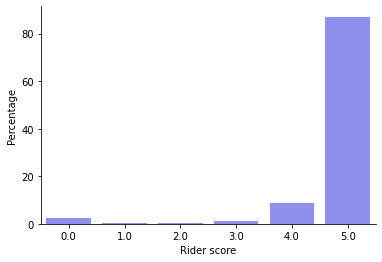

In [41]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()